In [1]:
!pip install prophet

  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   ------ --------------------------------- 2.1/13.3 MB 7.8 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/13.3 MB 9.1 MB/s eta 0:00:02
   -------------------- ------------------- 6.8/13.3 MB 10.0 MB/s eta 0:00:01
   ----------------------- ---------------- 7.9/13.3 MB 8.7 MB/s eta 0:00:01
   ---------------------------------- ----- 11.5/13.3 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 13.0 MB/s eta 0:00:00
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)


In [2]:
from prophet import Prophet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('Datasets/rossmann_train.csv', low_memory=False)

In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


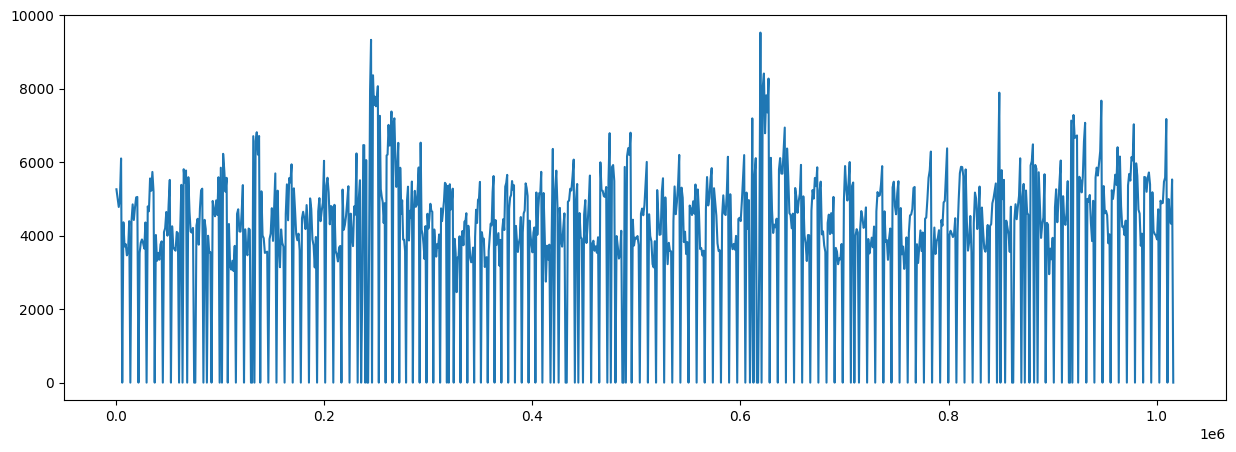

In [5]:
df[df['Store'] == 1]['Sales'].plot(figsize=(15, 5));

In [6]:
(df[df['Store'] == 1]['Sales'] == 0).sum()

161

In [7]:
store1 = df[df['Store'] == 1].copy()

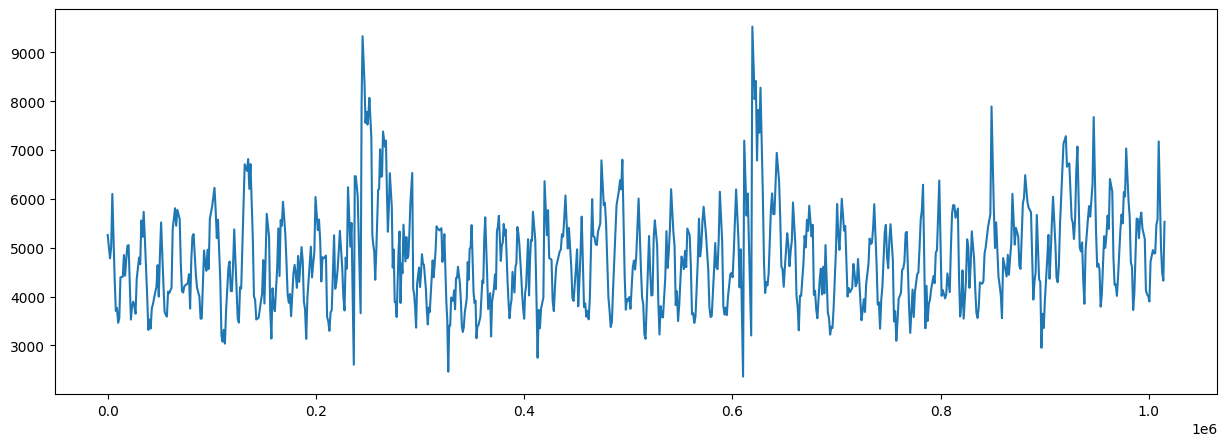

In [8]:
store1[store1['Open'] > 0]['Sales'].plot(figsize=(15, 5));

In [9]:
sales0 = store1[store1['Sales'] == 0].index
customers0 = store1[store1['Customers'] == 0].index
store_closed = store1[store1['Open'] == 0].index
print(np.all(sales0 == customers0))
print(np.all(store_closed == customers0))

True
True


In [10]:
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [11]:
store1['Date'] = pd.to_datetime(store1['Date'])

In [12]:
store1.set_index('Date', inplace=True)

In [13]:
store1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


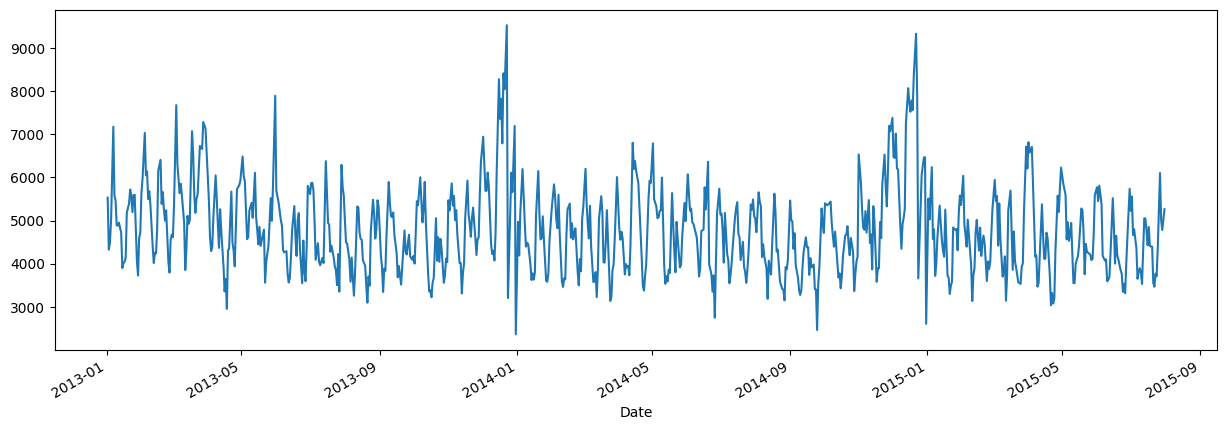

In [14]:
store1[store1['Customers'] > 0]['Sales'].plot(figsize=(15, 5));

In [15]:
df_p = store1[['Sales']].copy()

In [16]:
df_p['Date'] = df_p.index

In [17]:
df_p.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [18]:
df_p.tail()

,Sales,Date
Date,,
2013-01-05,4997,2013-01-05
2013-01-04,4486,2013-01-04
2013-01-03,4327,2013-01-03
2013-01-02,5530,2013-01-02
2013-01-01,0,2013-01-01


In [19]:
df_p.sort_index(inplace=True)

In [20]:
df_p.head(20)

,Sales,Date
Date,,
2013-01-01,0,2013-01-01
2013-01-02,5530,2013-01-02
2013-01-03,4327,2013-01-03
2013-01-04,4486,2013-01-04
2013-01-05,4997,2013-01-05
2013-01-06,0,2013-01-06
2013-01-07,7176,2013-01-07
2013-01-08,5580,2013-01-08
2013-01-09,5471,2013-01-09


In [21]:
df_p.tail()

,Sales,Date
Date,,
2015-07-27,6102,2015-07-27
2015-07-28,5011,2015-07-28
2015-07-29,4782,2015-07-29
2015-07-30,5020,2015-07-30
2015-07-31,5263,2015-07-31


In [22]:
df_p.columns = ['y', 'ds']

In [23]:
m = Prophet()

In [24]:
m.fit(df_p)

17:39:30 - cmdstanpy - INFO - Chain [1] start processing
17:39:30 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future = m.make_future_dataframe(periods=365)

In [26]:
future.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [27]:
future.tail()

,ds
1302,2016-07-26
1303,2016-07-27
1304,2016-07-28
1305,2016-07-29
1306,2016-07-30


In [28]:
forecast = m.predict(future)

In [29]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1302,2016-07-26,3724.598999,2980.034725,5827.457160,3702.372389,3748.262729,713.049649,713.049649,713.049649,706.388265,706.388265,706.388265,6.661384,6.661384,6.661384,0.0,0.0,0.0,4437.648648
1303,2016-07-27,3724.361238,2743.305176,5579.297842,3702.014203,3748.145958,502.189794,502.189794,502.189794,510.594230,510.594230,510.594230,-8.404436,-8.404436,-8.404436,0.0,0.0,0.0,4226.551032
1304,2016-07-28,3724.123477,2354.285373,5354.626692,3701.656018,3748.026298,126.204640,126.204640,126.204640,151.302734,151.302734,151.302734,-25.098094,-25.098094,-25.098094,0.0,0.0,0.0,3850.328117
1305,2016-07-29,3723.885716,2790.838002,5609.247067,3701.317211,3747.892162,530.572646,530.572646,530.572646,573.658633,573.658633,573.658633,-43.085987,-43.085987,-43.085987,0.0,0.0,0.0,4254.458361
1306,2016-07-30,3723.647954,3231.957575,6092.226392,3701.002562,3747.758026,937.120652,937.120652,937.120652,999.134741,999.134741,999.134741,-62.014089,-62.014089,-62.014089,0.0,0.0,0.0,4660.768606


C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


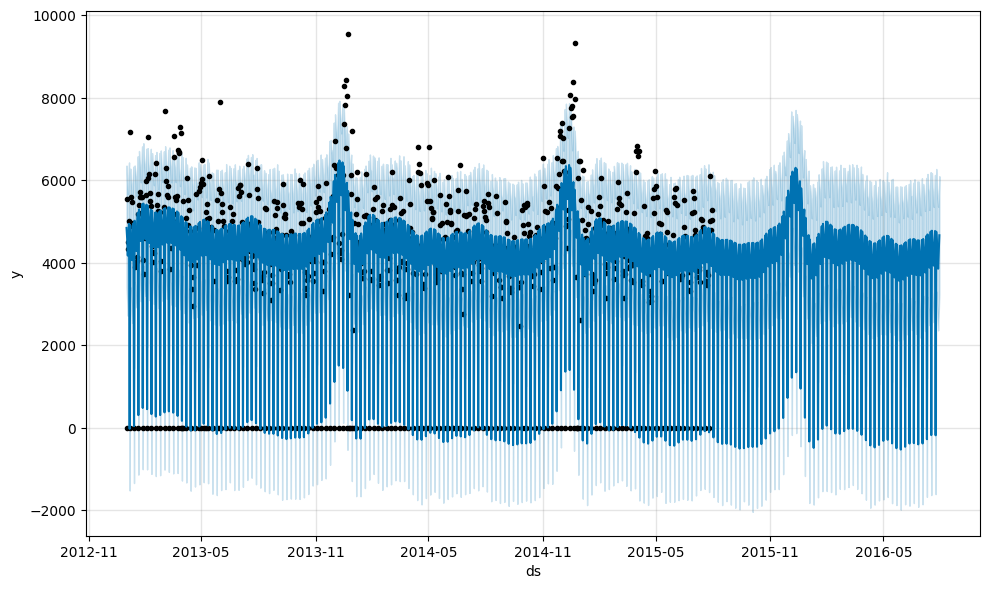

In [30]:
m.plot(forecast);

C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

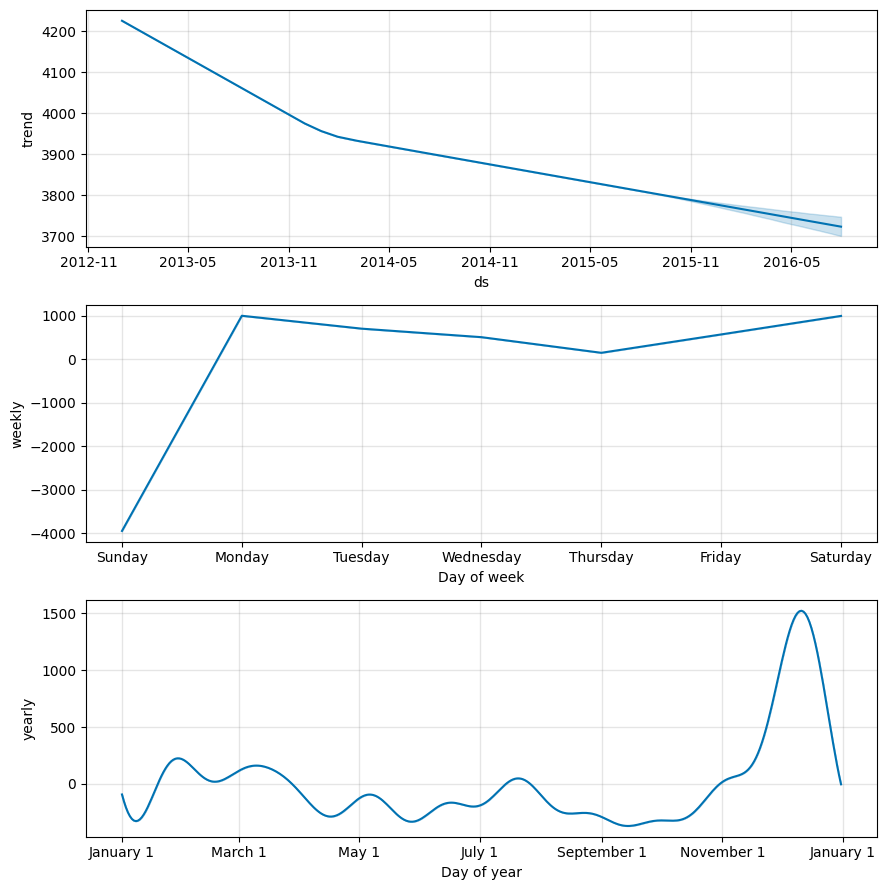

In [31]:
m.plot_components(forecast);

## Model Open Days Only

In [32]:
df_p2 = store1[store1['Open'] > 0][['Sales']].copy()
df_p2['Date'] = df_p2.index

In [33]:
df_p2.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [34]:
df_p2.columns = ['y', 'ds']

17:40:36 - cmdstanpy - INFO - Chain [1] start processing
17:40:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


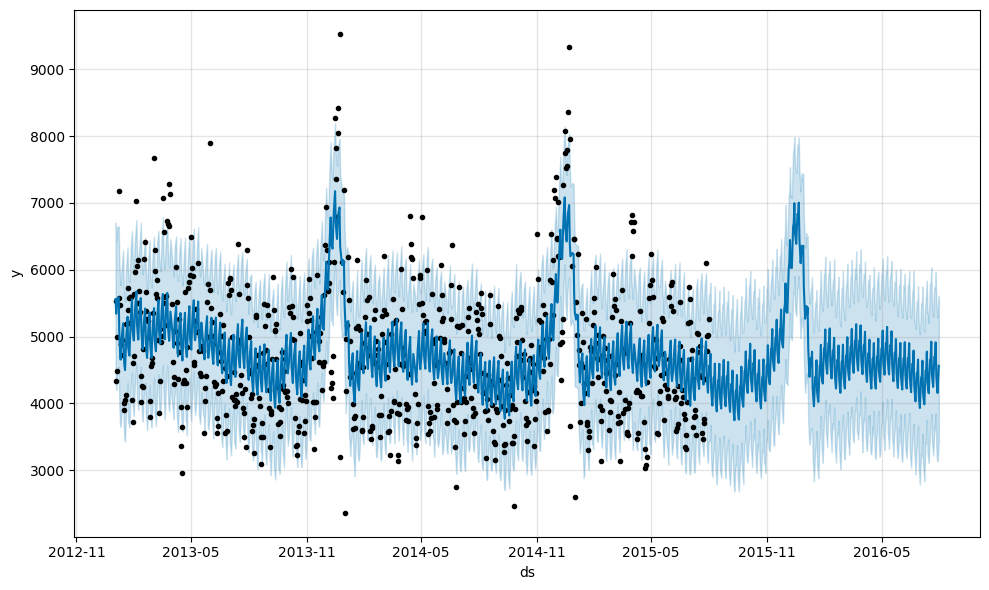

In [35]:
m2 = Prophet()
m2.fit(df_p2)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)
m2.plot(forecast2);

C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

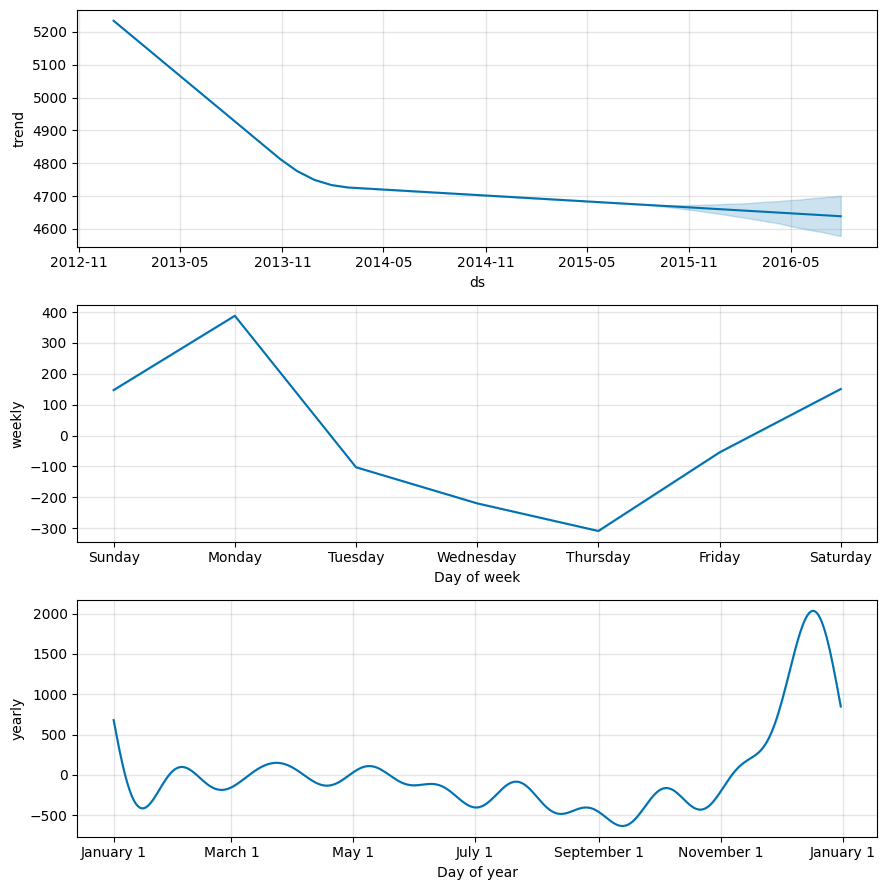

In [36]:
m2.plot_components(forecast2);

## Add Holidays

In [37]:
m3 = Prophet()

In [38]:
m3.add_country_holidays(country_name='US')

In [39]:
m3.fit(df_p2)

17:41:02 - cmdstanpy - INFO - Chain [1] start processing
17:41:02 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
future3 = m3.make_future_dataframe(periods=365)

In [41]:
forecast3 = m3.predict(future3)

C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


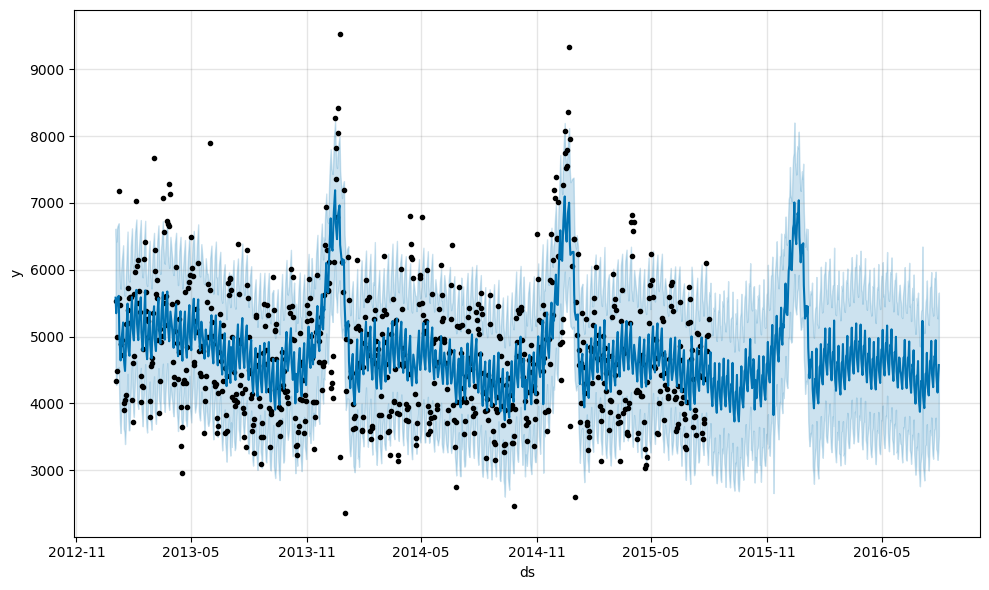

In [42]:
m3.plot(forecast3);

C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

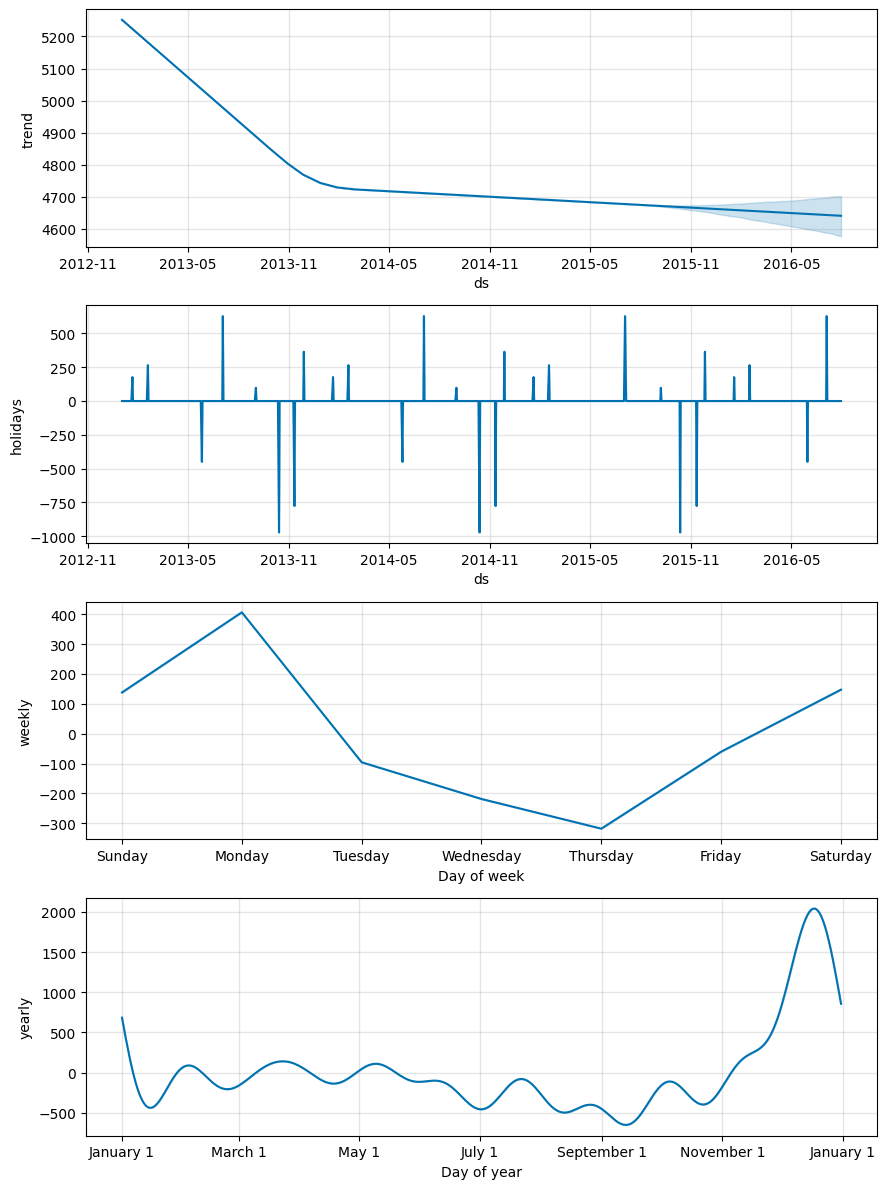

In [43]:
m3.plot_components(forecast3);

## Add Regressors

In [44]:
set(store1['StateHoliday'])

{'0', 'a', 'b', 'c'}

In [45]:
set(store1['SchoolHoliday'])

{0, 1}

In [46]:
df_p['open'] = store1['Open']
df_p['promo'] = store1['Promo']
df_p[['SH1', 'SH2', 'SH3']] = pd.get_dummies(
    store1['StateHoliday'], drop_first=True)
df_p['SchoolHoliday'] = store1['SchoolHoliday']

In [47]:
df_p.head(20)

,y,ds,open,promo,SH1,SH2,SH3,SchoolHoliday
Date,,,,,,,,
2013-01-01,0,2013-01-01,0,0,True,False,False,1
2013-01-02,5530,2013-01-02,1,0,False,False,False,1
2013-01-03,4327,2013-01-03,1,0,False,False,False,1
2013-01-04,4486,2013-01-04,1,0,False,False,False,1
2013-01-05,4997,2013-01-05,1,0,False,False,False,1
2013-01-06,0,2013-01-06,0,0,False,False,False,1
2013-01-07,7176,2013-01-07,1,1,False,False,False,1
2013-01-08,5580,2013-01-08,1,1,False,False,False,1
2013-01-09,5471,2013-01-09,1,1,False,False,False,1


In [48]:
m4 = Prophet()
m4.add_regressor('open', mode='multiplicative')
m4.add_regressor('promo', mode='additive')
m4.add_regressor('SH1', mode='additive')
m4.add_regressor('SH2', mode='additive')
m4.add_regressor('SH3', mode='additive')
m4.add_regressor('SchoolHoliday', mode='additive')
m4.fit(df_p)

17:41:42 - cmdstanpy - INFO - Chain [1] start processing
17:41:42 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future4 = m4.make_future_dataframe(periods=365)

In [50]:
train_idx = future4['ds'].isin(df_p.index)
test_idx = ~train_idx

In [ ]:
regressors = ['open', 'promo', 'SH1', 'SH2', 'SH3', 'SchoolHoliday']
for r in regressors:
  future4.loc[train_idx, r] = df_p[r].to_list()

In [52]:
# let's just pretend we know this, even though we do not
# it would take a lot of work to gather this data
future4.loc[test_idx, 'open'] = \
  future4.loc[test_idx, 'ds'].apply(lambda x: 1.0 * (x.weekday() != 6))

for r in regressors[1:]:
  future4.loc[test_idx, r] = \
    df_p.iloc[-365:][r].to_list()

In [53]:
future4.tail(10)

,ds,open,promo,SH1,SH2,SH3,SchoolHoliday
1297,2016-07-21,1.0,0.0,False,False,False,0.0
1298,2016-07-22,1.0,0.0,False,False,False,0.0
1299,2016-07-23,1.0,0.0,False,False,False,0.0
1300,2016-07-24,0.0,0.0,False,False,False,0.0
1301,2016-07-25,1.0,0.0,False,False,False,0.0
1302,2016-07-26,1.0,1.0,False,False,False,1.0
1303,2016-07-27,1.0,1.0,False,False,False,1.0
1304,2016-07-28,1.0,1.0,False,False,False,1.0
1305,2016-07-29,1.0,1.0,False,False,False,1.0
1306,2016-07-30,1.0,1.0,False,False,False,1.0


In [54]:
forecast4 = m4.predict(future4)

C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


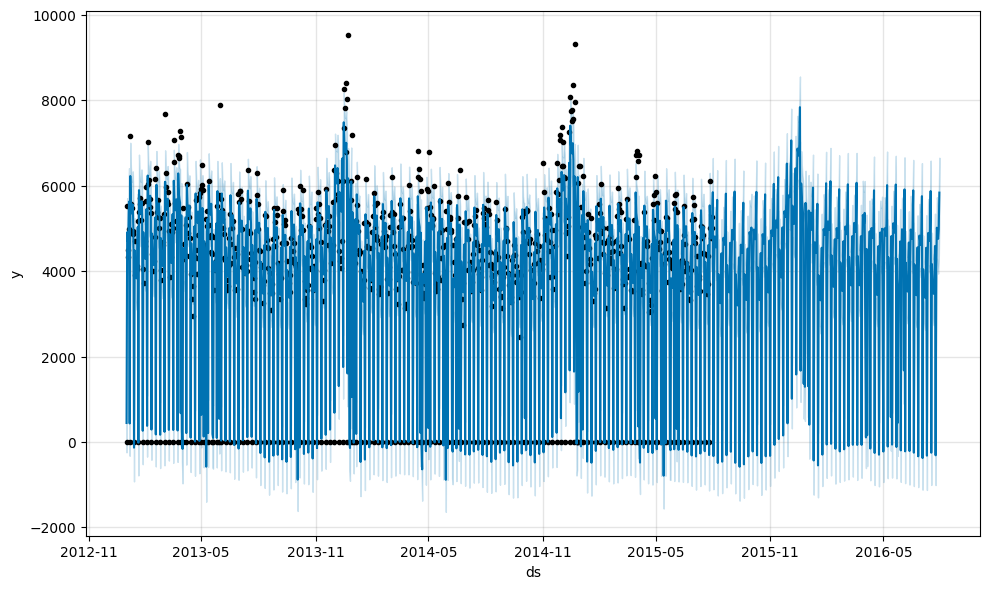

In [55]:
m4.plot(forecast4);

C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

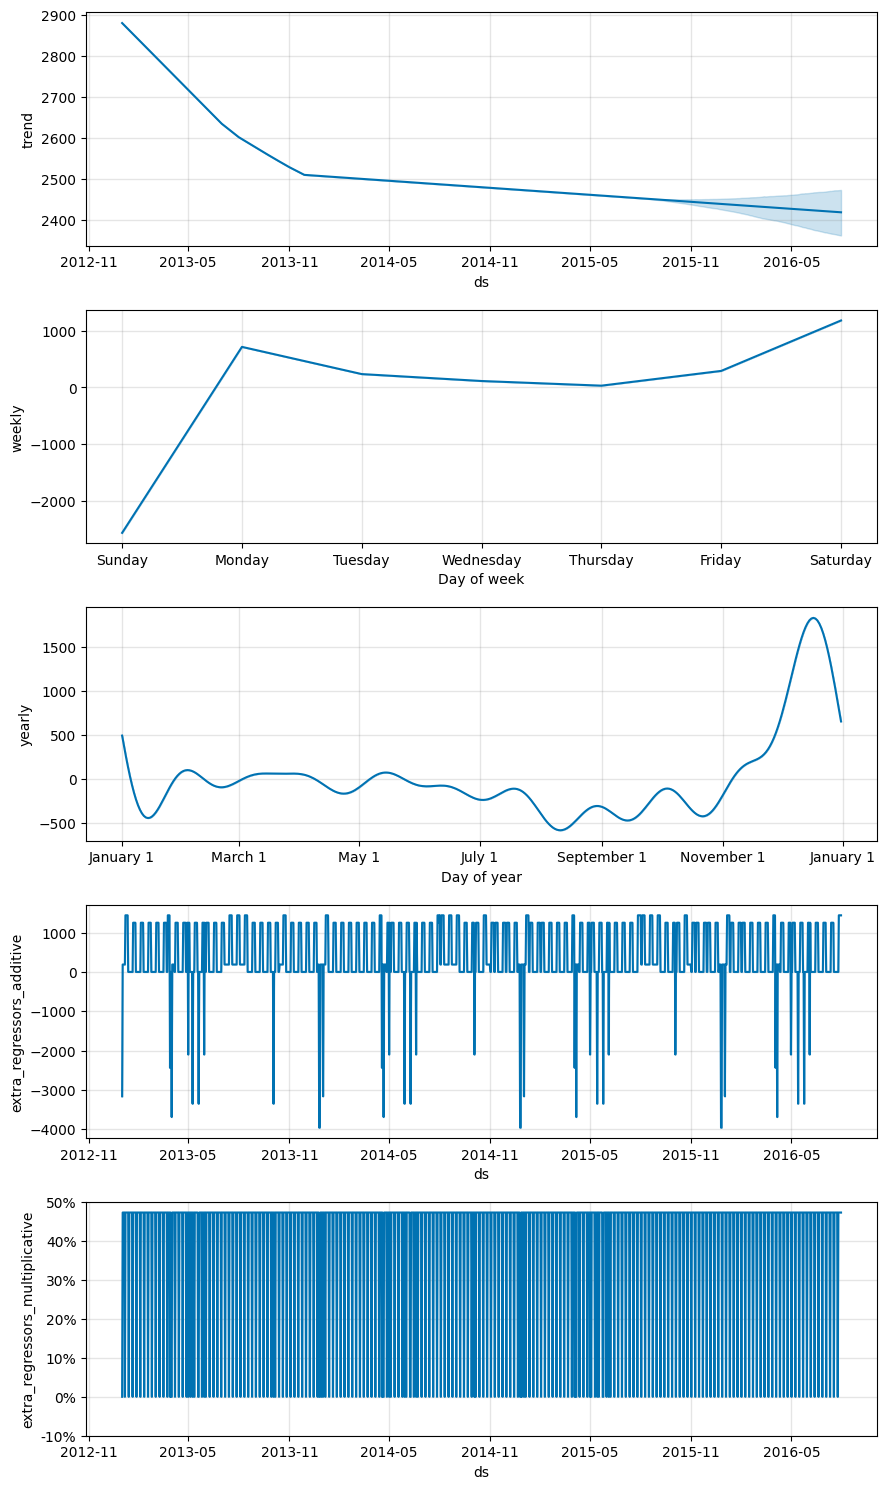

In [56]:
m4.plot_components(forecast4);

## Cross-Validation

In [57]:
from prophet.diagnostics import cross_validation

In [58]:
df_cv = cross_validation(
    m,
    initial='730 days',
    period='30 days',
    horizon='60 days')

  0%|          | 0/6 [00:00<?, ?it/s]

17:42:47 - cmdstanpy - INFO - Chain [1] start processing
17:42:47 - cmdstanpy - INFO - Chain [1] done processing
17:42:47 - cmdstanpy - INFO - Chain [1] start processing
17:42:47 - cmdstanpy - INFO - Chain [1] done processing
17:42:47 - cmdstanpy - INFO - Chain [1] start processing
17:42:47 - cmdstanpy - INFO - Chain [1] done processing
17:42:48 - cmdstanpy - INFO - Chain [1] start processing
17:42:48 - cmdstanpy - INFO - Chain [1] done processing
17:42:48 - cmdstanpy - INFO - Chain [1] start processing
17:42:48 - cmdstanpy - INFO - Chain [1] done processing
17:42:48 - cmdstanpy - INFO - Chain [1] start processing
17:42:48 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-03,4612.183309,3136.167451,6069.784177,5023,2015-01-02
1,2015-01-04,-441.878139,-1912.325259,1091.492203,0,2015-01-02
2,2015-01-05,4574.131377,2998.032944,6046.915247,6239,2015-01-02
3,2015-01-06,4189.020494,2729.659293,5581.078228,4574,2015-01-02
4,2015-01-07,3950.876574,2516.884600,5383.869201,4796,2015-01-02
...,...,...,...,...,...,...
355,2015-07-27,4791.395410,3420.834054,6273.131183,6102,2015-06-01
356,2015-07-28,4466.849519,2980.315203,5927.306189,5011,2015-06-01
357,2015-07-29,4252.228830,2755.607636,5697.238065,4782,2015-06-01
358,2015-07-30,3876.622614,2447.628995,5272.646074,5020,2015-06-01


In [60]:
from prophet.diagnostics import performance_metrics

In [61]:
pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mdape,smape,coverage
0,6 days,2.223636e+06,1491.186110,919.609816,0.138169,0.550357,0.805556
1,7 days,1.587809e+06,1260.082987,758.556450,0.134227,0.491755,0.833333
2,8 days,1.462808e+06,1209.465833,705.495506,0.124071,0.486258,0.888889
3,9 days,1.165782e+06,1079.713909,689.723887,0.145229,0.453825,0.916667
4,10 days,5.043820e+05,710.198599,578.954183,0.156795,0.460461,0.944444
5,11 days,4.956430e+05,704.019148,570.084299,0.148970,0.403627,0.944444
6,12 days,8.562216e+05,925.322413,634.406011,0.148970,0.450544,0.944444
7,13 days,8.255995e+05,908.625081,605.628842,0.135744,0.441898,0.944444
8,14 days,7.805913e+05,883.510801,566.032339,0.123950,0.433057,0.944444
9,15 days,6.533861e+05,808.323022,496.764729,0.103078,0.414432,0.972222


C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


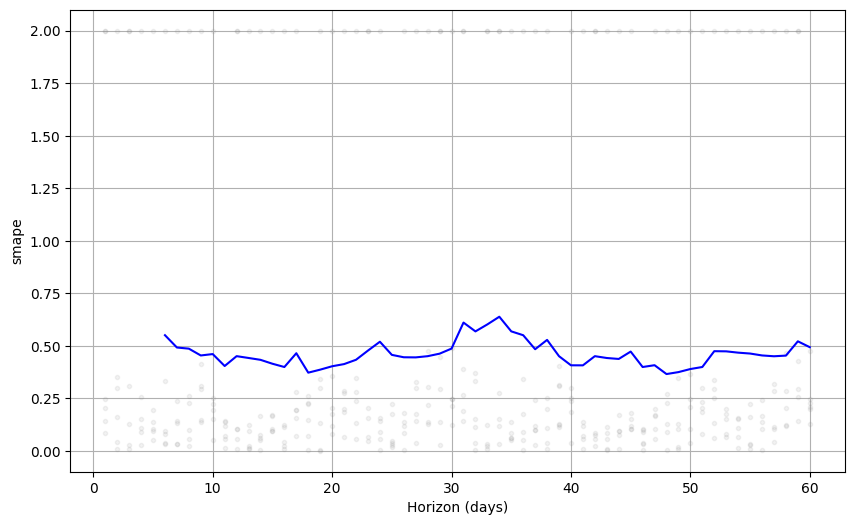

In [62]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

In [63]:
df_cv2 = cross_validation(
    m2,
    initial='730 days',
    period='30 days',
    horizon='60 days')

  0%|          | 0/6 [00:00<?, ?it/s]

17:43:10 - cmdstanpy - INFO - Chain [1] start processing
17:43:10 - cmdstanpy - INFO - Chain [1] done processing
17:43:10 - cmdstanpy - INFO - Chain [1] start processing
17:43:10 - cmdstanpy - INFO - Chain [1] done processing
17:43:10 - cmdstanpy - INFO - Chain [1] start processing
17:43:11 - cmdstanpy - INFO - Chain [1] done processing
17:43:11 - cmdstanpy - INFO - Chain [1] start processing
17:43:11 - cmdstanpy - INFO - Chain [1] done processing
17:43:11 - cmdstanpy - INFO - Chain [1] start processing
17:43:11 - cmdstanpy - INFO - Chain [1] done processing
17:43:11 - cmdstanpy - INFO - Chain [1] start processing
17:43:11 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
pm2 = performance_metrics(df_cv2)

C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


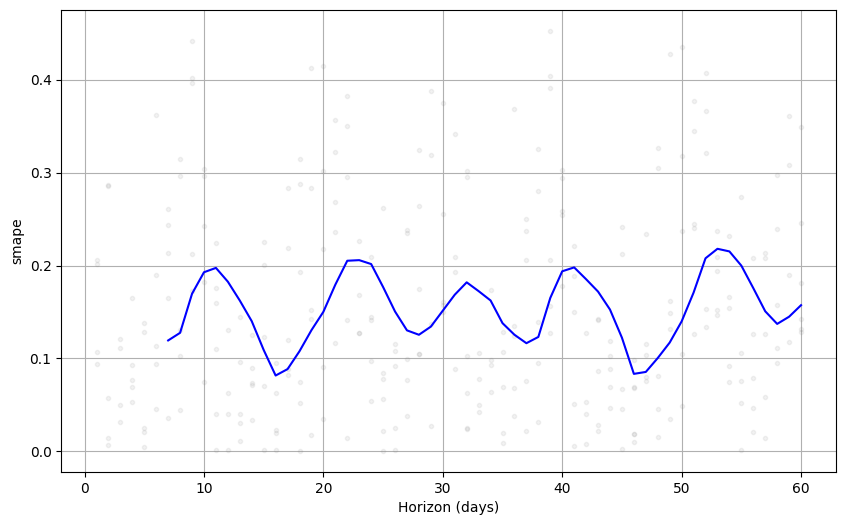

In [65]:
plot_cross_validation_metric(df_cv2, metric='smape');

In [66]:
df_cv3 = cross_validation(
    m3,
    initial='730 days',
    period='30 days',
    horizon='60 days')
pm3 = performance_metrics(df_cv3)

  0%|          | 0/6 [00:00<?, ?it/s]

17:43:35 - cmdstanpy - INFO - Chain [1] start processing
17:43:35 - cmdstanpy - INFO - Chain [1] done processing
17:43:35 - cmdstanpy - INFO - Chain [1] start processing
17:43:36 - cmdstanpy - INFO - Chain [1] done processing
17:43:36 - cmdstanpy - INFO - Chain [1] start processing
17:43:36 - cmdstanpy - INFO - Chain [1] done processing
17:43:36 - cmdstanpy - INFO - Chain [1] start processing
17:43:36 - cmdstanpy - INFO - Chain [1] done processing
17:43:36 - cmdstanpy - INFO - Chain [1] start processing
17:43:37 - cmdstanpy - INFO - Chain [1] done processing
17:43:37 - cmdstanpy - INFO - Chain [1] start processing
17:43:37 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


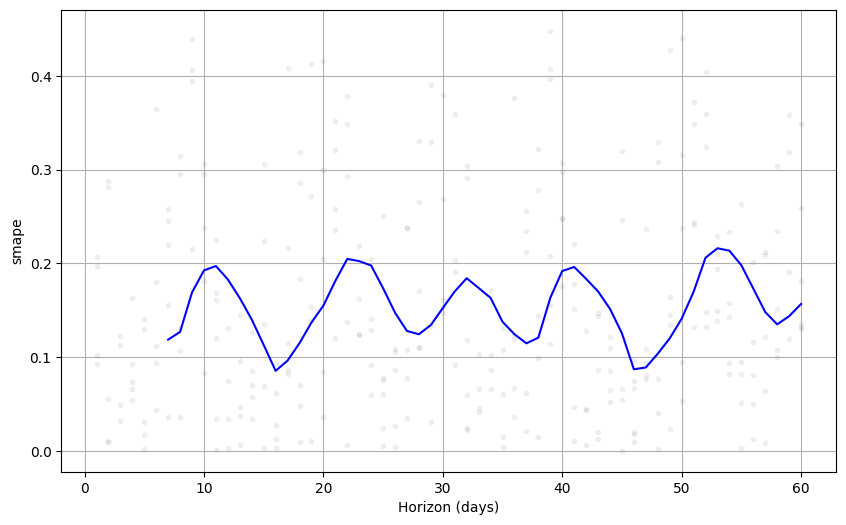

In [67]:
plot_cross_validation_metric(df_cv3, metric='smape');

In [68]:
df_cv4 = cross_validation(
    m4,
    initial='730 days',
    period='30 days',
    horizon='60 days')
pm4 = performance_metrics(df_cv4)

  0%|          | 0/6 [00:00<?, ?it/s]

17:43:53 - cmdstanpy - INFO - Chain [1] start processing
17:43:53 - cmdstanpy - INFO - Chain [1] done processing
17:43:54 - cmdstanpy - INFO - Chain [1] start processing
17:43:54 - cmdstanpy - INFO - Chain [1] done processing
17:43:54 - cmdstanpy - INFO - Chain [1] start processing
17:43:54 - cmdstanpy - INFO - Chain [1] done processing
17:43:54 - cmdstanpy - INFO - Chain [1] start processing
17:43:54 - cmdstanpy - INFO - Chain [1] done processing
17:43:55 - cmdstanpy - INFO - Chain [1] start processing
17:43:55 - cmdstanpy - INFO - Chain [1] done processing
17:43:55 - cmdstanpy - INFO - Chain [1] start processing
17:43:55 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


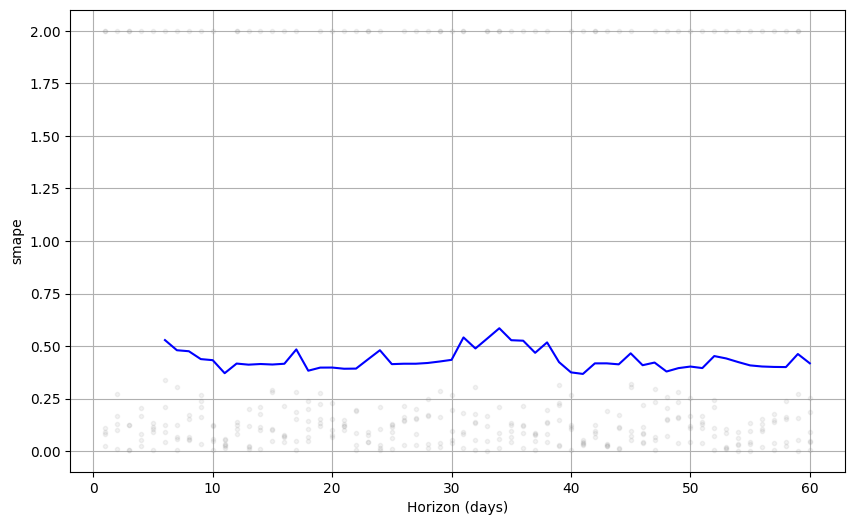

In [69]:
plot_cross_validation_metric(df_cv4, metric='smape');

In [70]:
pm['smape'].mean(), pm2['smape'].mean(), pm3['smape'].mean(), pm4['smape'].mean()

(0.461775405515676,
 0.15371307521687194,
 0.15402386271741614,
 0.4357805114466113)

### Changepoint Detection

In [71]:
from prophet.plot import add_changepoints_to_plot

C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


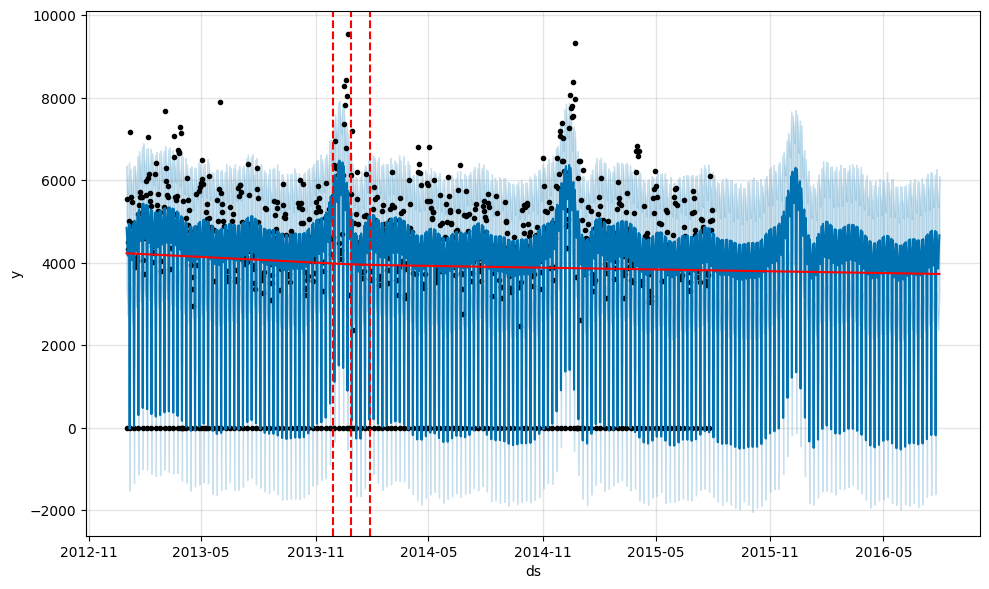

In [72]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

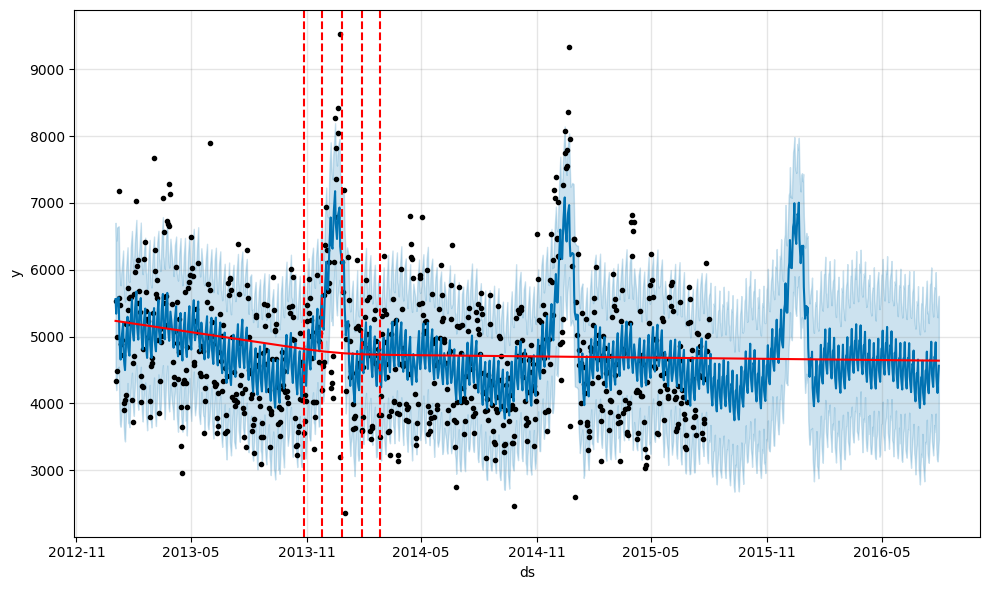

In [73]:
fig = m2.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), m2, forecast2)

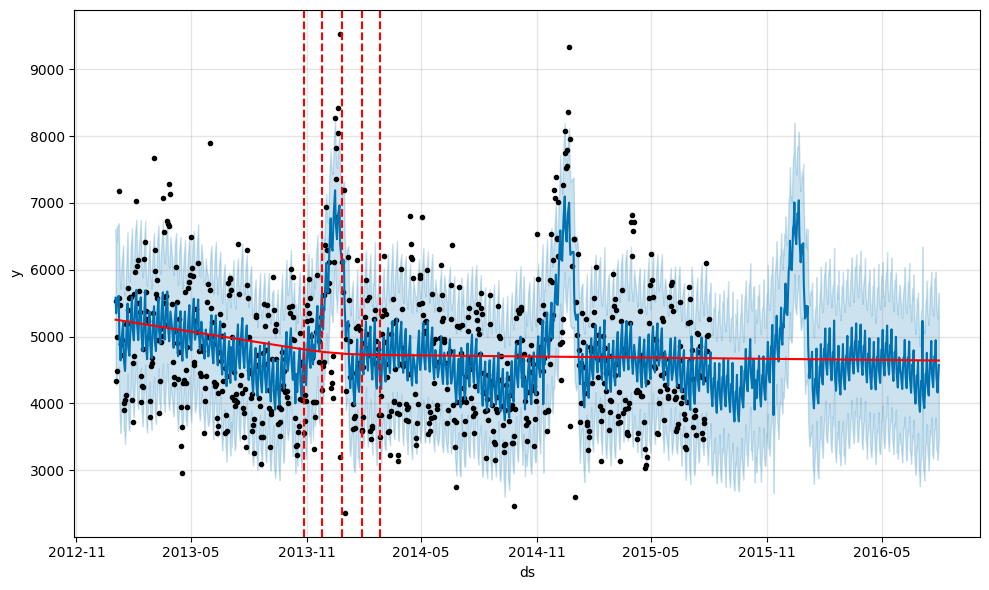

In [74]:
fig = m3.plot(forecast3)
a = add_changepoints_to_plot(fig.gca(), m3, forecast3)

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible

17:44:44 - cmdstanpy - INFO - Chain [1] start processing
17:44:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


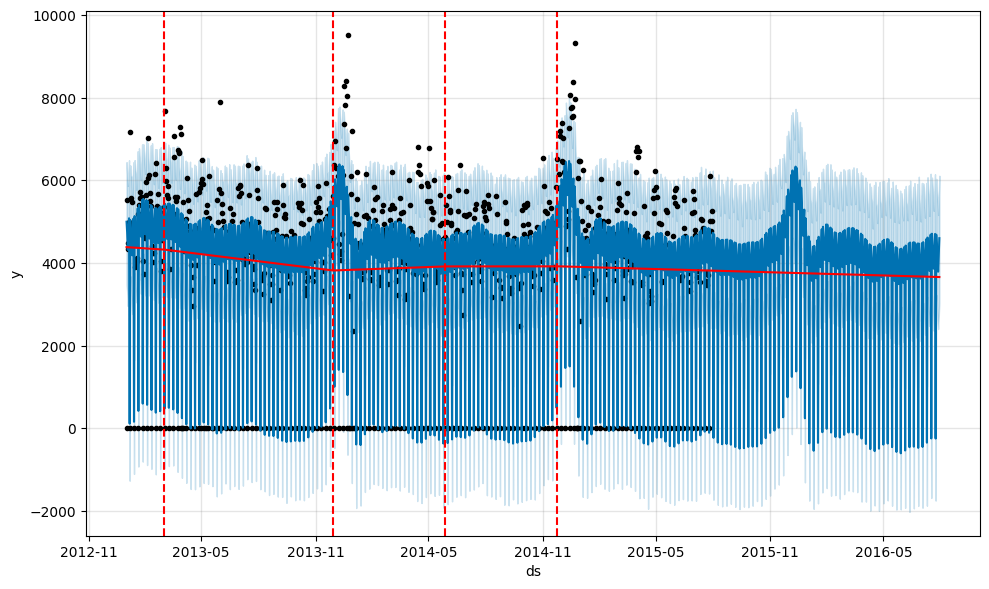

In [75]:
m_a = Prophet(changepoint_prior_scale=0.5)
forecast_a = m_a.fit(df_p).predict(future)
fig = m_a.plot(forecast_a)
a = add_changepoints_to_plot(fig.gca(), m_a, forecast_a)

17:44:48 - cmdstanpy - INFO - Chain [1] start processing
17:44:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


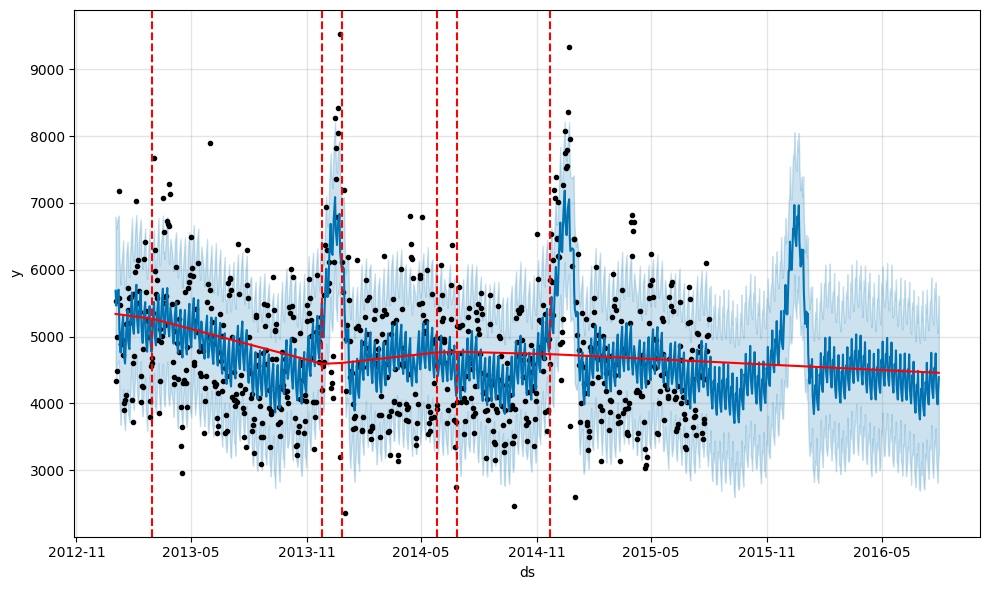

In [76]:
m2_a = Prophet(changepoint_prior_scale=0.5)
forecast2_a = m2_a.fit(df_p2).predict(future2)
fig = m2_a.plot(forecast2_a)
a = add_changepoints_to_plot(fig.gca(), m2_a, forecast2_a)

17:44:54 - cmdstanpy - INFO - Chain [1] start processing
17:44:54 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\envs\Tensorflow_GPU\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


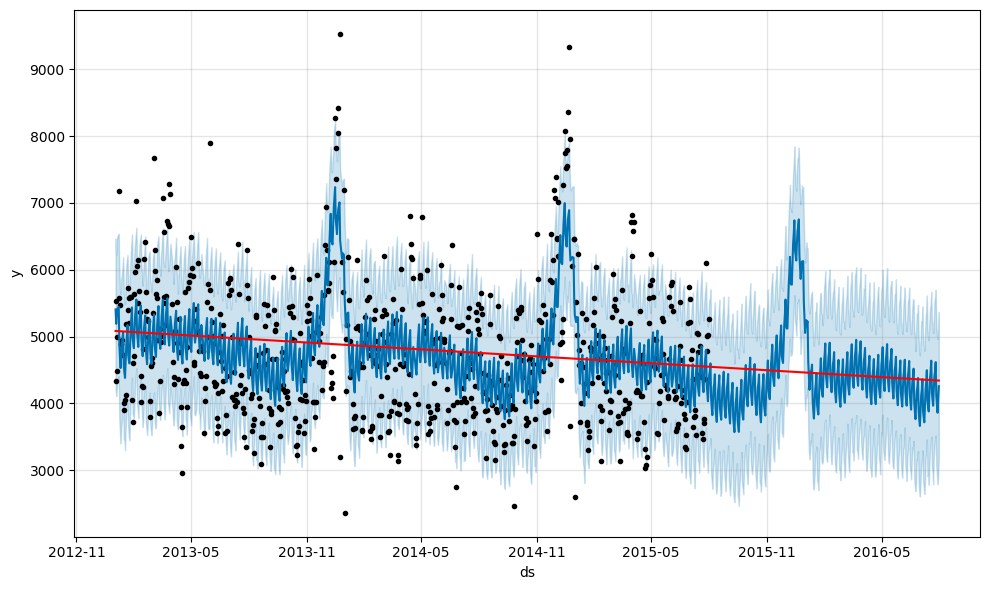

In [77]:
m2_a = Prophet(changepoint_prior_scale=0.005)
forecast2_a = m2_a.fit(df_p2).predict(future2)
fig = m2_a.plot(forecast2_a)
a = add_changepoints_to_plot(fig.gca(), m2_a, forecast2_a)